In [33]:
faa = np.random.uniform(-1,1,50)
faa

array([ 0.59822698, -0.32480096,  0.37110209, -0.54062896, -0.302998  ,
       -0.32868204,  0.47417157, -0.36787912,  0.58199425, -0.91089229,
       -0.63018787, -0.80302419,  0.39853368,  0.91919224, -0.00125246,
        0.83825609, -0.05576135,  0.37973978, -0.01656179, -0.77569312,
        0.91695064,  0.90997641, -0.79058635, -0.51276812, -0.17825308,
        0.93115595, -0.41203467, -0.01317325,  0.37723828, -0.5170114 ,
       -0.87796737, -0.38547679,  0.13120507, -0.56784137, -0.90017549,
       -0.51795504, -0.90141964, -0.2432879 , -0.0987275 ,  0.76757029,
       -0.59313508,  0.34883174,  0.42157037, -0.63549164,  0.85783929,
        0.53746007,  0.35487862, -0.98778852, -0.78301077,  0.76539115])

In [40]:
#mode selection



ionian = [ "62", "64", "65", "67", "81", "83", "72"]  #Bright, Joyful, Stable
dorian = [ "62", "63" ,"65", "67", "81", "82", "72"] #Jazzy, Bluesy, Rocky, Thoughtful, Uncertain, Sophisticated
phrygian = [ "61" ,"63", "65", "67", "80", "82", "72"]  #Exotic, Latin, Lively, Dark, Mystic
lydian =  [ "62" , "64" , "66" , "67" ,"81" ,"83", "72"] # Hopeful, Dreamy, Heavenly, Yearning, Ethereal, Uplifting
mixolydian = ["62" , "64" , "65" , "67" , "81" , "82", "72"] #Positive, Bluesy, Rocky, Poppy, Searching 
aeolian = [ "62" , "63" , "65" , "67" , "80" , "82", "72"] #Sad, Melancholic, Romantic, Oppressive
locrian = [ "61" , "63" , "65" , "66" , "80" , "82", "72"] #Complex, Unstable, Exotic, Tense
scales = {'ionian' : ionian, 'dorian' : dorian, 'phrygian': phrygian, 'lydian': lydian, 'mixolydian':mixolydian, 'aeolian':aeolian,'locrian':locrian}
phase = 50
def getStep(num):
    step = 2/7
    return 1-num*step
def get_Scale(faa):
    if faa >= getStep(1):
        return scales.get('ionian')

    elif faa <= getStep(1) and faa >= getStep(2):
        return scales.get('dorian')

    elif faa <= getStep(2) and faa >= getStep(3):
        return scales.get('phrygian')

    elif faa <= getStep(3) and faa >= getStep(4):
        return scales.get('lydian')

    elif faa <= getStep(4) and faa >= getStep(5):
        return scales.get('mixolydian')

    elif faa <= getStep(5) and faa >= getStep(6):
        return scales.get('aeolian')

    elif faa <= getStep(6) and faa >= getStep(7):
        return scales.get('locrian')
    else:
        return scales.get('ionian')
    


meanFAA = np.mean(faa)
mode = get_Scale(meanFAA)
print(mode)
    

['62', '64', '66', '67', '81', '83', '72']


[141.364576    76.56096427  61.64832921  59.5549169  159.93534595
 129.19981278 139.28628909  65.97472751  71.77444617 170.63988658
  94.10229089 180.99229603 104.94685942  78.88189727 154.00423341
  82.55675854  73.65420073  62.41761533 100.27047402 111.00102418
  68.47019312  80.77530964  76.65755666  62.60829215  85.49680676
  63.53203302  86.01778635  67.1249247   80.15644166  69.1642938
 153.99668504 102.26054966  88.98619725  75.54819148  65.43443679
 112.71648089  62.70963156 107.34552132 150.10672978  78.50483044
 139.09161938  76.17995815  68.00381486  68.47550796  71.53578464
  61.83838294 146.60466181  77.38219193 147.40350479  76.39043506]


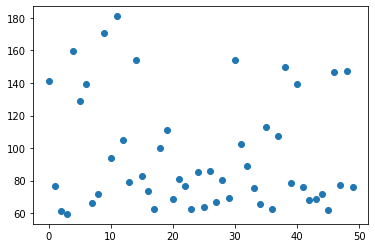

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
c = 40
alpha = 1.1
amp = 0


alphas = np.random.uniform(0.5, 1.5, 50)
amps = np.random.uniform(150, 200, 50)


def midiRange(c, alpha, amp):
    lamp = np.log10(amp)
    return  (c/alpha)*lamp

def midiNote(num):
    return 0

midis = midiRange(c, alphas, amps)
plt.scatter(x = np.arange(0,50) , y = midis)
print(midis)

In [58]:
np.log10(0)

C:\Users\user1\AppData\Local\Temp\ipykernel_14296\135924841.py:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(0)


-inf

In [66]:
from sklearn import preprocessing

def midiNums(arr, mode):
    midis_arr = arr.reshape(-1, 1)
    #scaler = preprocessing.StandardScaler().fit(X_train)
    scaler = preprocessing.MinMaxScaler(feature_range=(int(mode[0]), int(mode[-1])))
    scaler = scaler.fit(midis_arr)
    midis_scaled = scaler.transform(midis_arr)
    return midis_scaled

# Checking reconstruction
#X_rec = scaler.inverse_transform(X_scaled)
scaled = midiNums(midis, mode)
print(scaled)

[[68.7367774 ]
 [63.40039644]
 [62.17238616]
 [62.        ]
 [70.266024  ]
 [67.73504603]
 [68.56563677]
 [62.52865194]
 [63.00624119]
 [71.14751047]
 [64.84487151]
 [72.        ]
 [65.73788885]
 [63.59151824]
 [69.77761487]
 [63.89413192]
 [63.16103328]
 [62.23573454]
 [65.35280269]
 [66.23643096]
 [62.73414597]
 [63.74743501]
 [63.40835053]
 [62.25143619]
 [64.13623598]
 [62.32750345]
 [64.17913707]
 [62.62336719]
 [63.6964731 ]
 [62.79130305]
 [69.77699328]
 [65.51667938]
 [64.42357671]
 [63.31699767]
 [62.48416064]
 [66.37769362]
 [62.25978119]
 [65.93541138]
 [69.45666726]
 [63.56046793]
 [68.54960631]
 [63.36902174]
 [62.69574113]
 [62.73458363]
 [62.98658813]
 [62.18803651]
 [69.16828258]
 [63.46802205]
 [69.23406488]
 [63.38635388]]


(array([11., 18.,  5.,  0.,  4.,  1.,  0.,  8.,  2.,  1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

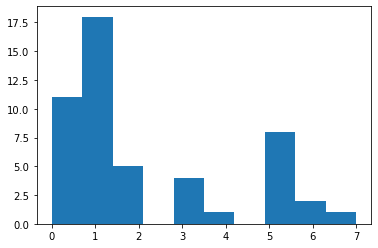

In [74]:


def getNote(mode, midi_scaled):
    
    #midis_arr = arr.reshape(-1, 1)
    #scaler = preprocessing.StandardScaler().fit(X_train)
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 7))
    scaler = scaler.fit(midi_scaled)
    note_index = scaler.transform(midi_scaled)
    rounded = np.round(note_index)
    return rounded
    


notes = getNote(mode, scaled)
#plt.scatter(x = np.arange(50), y = notes)
plt.hist(notes)